In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
# Load dataset

data_path = "wine_development(in).csv"
df = pd.read_csv(data_path)

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,wine_id
0,5.8,0.31,0.32,4.5,0.024,28.0,94.0,0.98906,3.25,0.52,13.7,7,white,1198
1,6.3,0.13,0.42,1.1,0.043,63.0,146.0,0.99066,3.13,0.72,11.2,7,white,3409
2,8.2,0.30,0.44,12.4,0.043,52.0,154.0,0.99452,3.04,0.33,12.0,6,white,4789
3,9.4,0.17,0.55,1.6,0.049,14.0,94.0,0.99490,3.02,0.61,10.3,6,white,3054
4,5.3,0.30,0.16,4.2,0.029,37.0,100.0,0.99050,3.30,0.36,11.8,8,white,2812


# 1. Data Preperation

### 1.1 Drop wine_ID

In [28]:
df = df.drop(columns=["wine_id"])

## 1.1 Check for outliers

In [29]:


# Number of missing values per column
missing_values = df.isna().sum()

missing_values


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [30]:

numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

numeric_columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

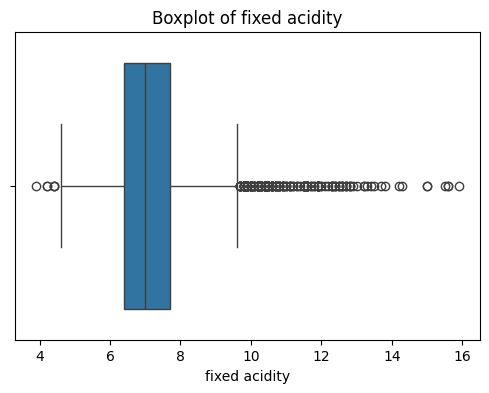

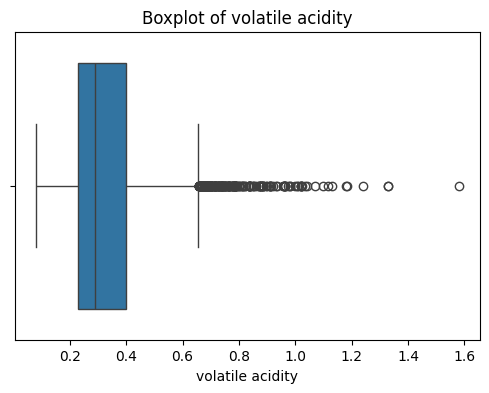

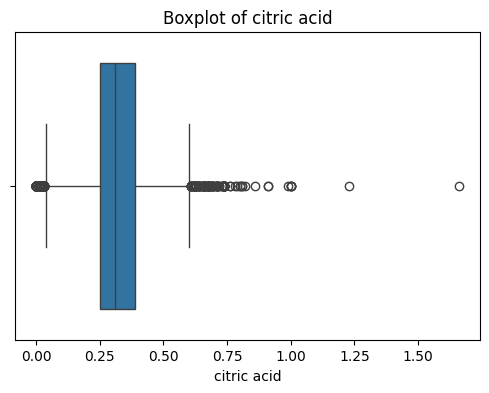

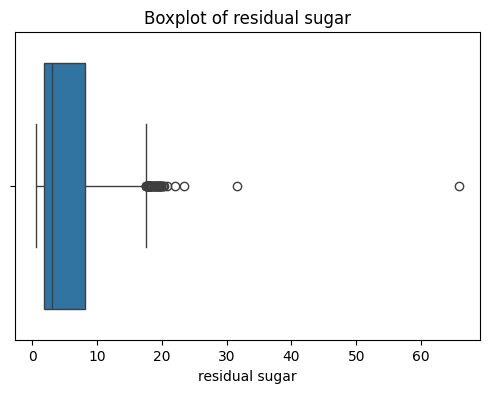

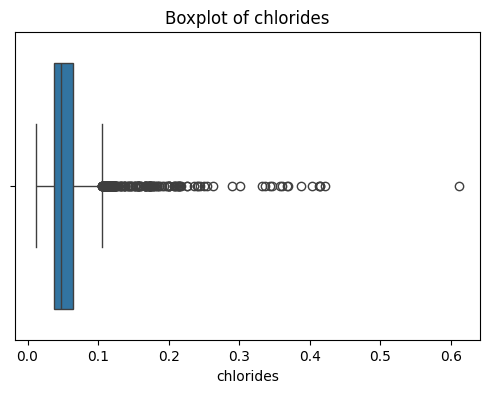

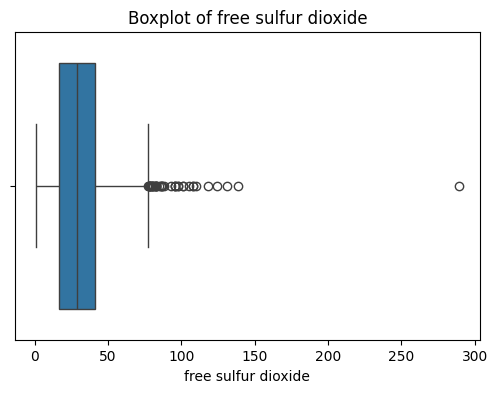

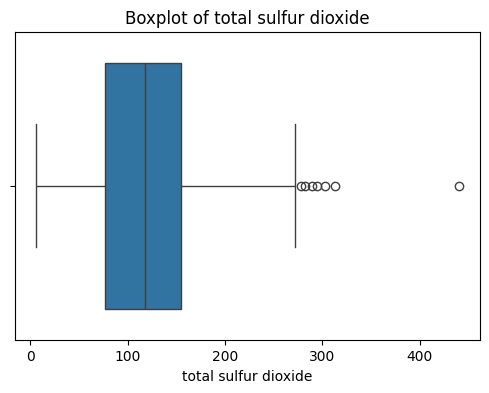

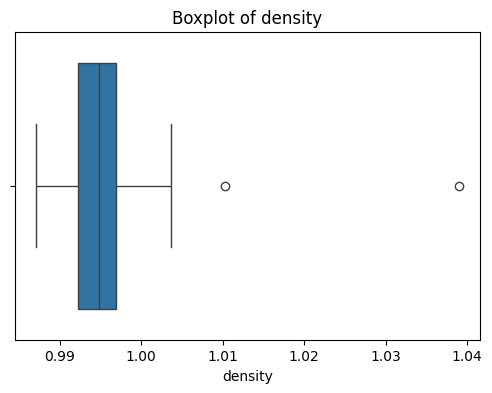

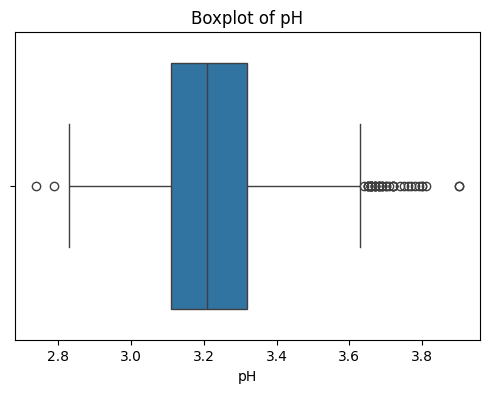

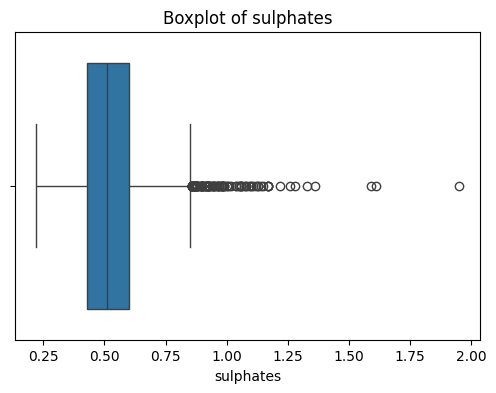

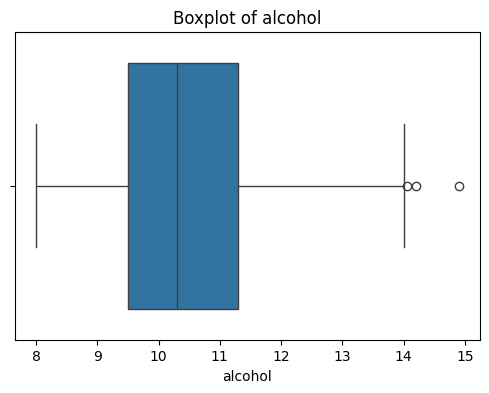

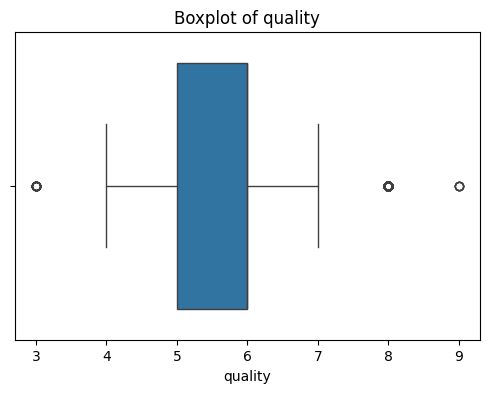

In [31]:

# Boxplots for each numeric variable

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


## 1.2 Check for balance/imbalance of class labels

In [32]:

target = "color"


In [33]:

class_counts = df[target].value_counts()
class_counts


color
white    3134
red      1023
Name: count, dtype: int64

In [34]:

class_percentages = df[target].value_counts(normalize=True) * 100
class_percentages


color
white    75.390907
red      24.609093
Name: proportion, dtype: float64

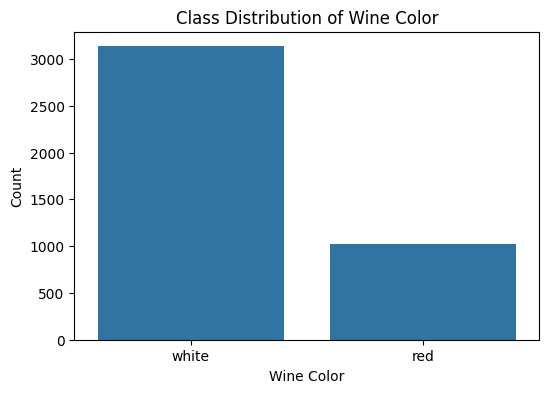

In [35]:

plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=df)
plt.title("Class Distribution of Wine Color")
plt.xlabel("Wine Color")
plt.ylabel("Count")
plt.show()


## 1.3 Split data + Scale data

In [36]:

# Split into features (X) and target (y)

target = "color"

X = df.drop(columns=[target])
y = df[target]

# Train/Test split (stratified)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Keep class proportions
)


# Feature scaling (fit on train, transform both)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   # Fit ONLY on train
X_test_scaled = scaler.transform(X_test)         # Transform test with same scaler

# Quick check: shapes
X_train_scaled.shape, X_test_scaled.shape


((3325, 12), (832, 12))

## 1.4 Use stratified splits to preserver class proportions

In [37]:

# Check class proportions in full / train / test


# Full dataset proportions
full_props = y.value_counts(normalize=True)

# Train set proportions
train_props = y_train.value_counts(normalize=True)

# Test set proportions
test_props = y_test.value_counts(normalize=True)

# Combine into one table
class_distribution_check = pd.DataFrame({
    "full": full_props,
    "train": train_props,
    "test": test_props
}).fillna(0)

# Show as percentages
(class_distribution_check * 100).round(2)


,full,train,test
color,,,
white,75.39,75.4,75.36
red,24.61,24.6,24.64


# 2. Model Configuration

## 2.1 Null-Model

In [38]:

# Determine majority class from training data

majority_class = y_train.value_counts().idxmax()
majority_class


'white'

In [39]:

# Null model predictions (always predict majority class)

y_pred_null = np.full(shape=y_test.shape, fill_value=majority_class)


In [40]:

# Null model accuracy

null_accuracy = accuracy_score(y_test, y_pred_null)
null_accuracy


0.7536057692307693

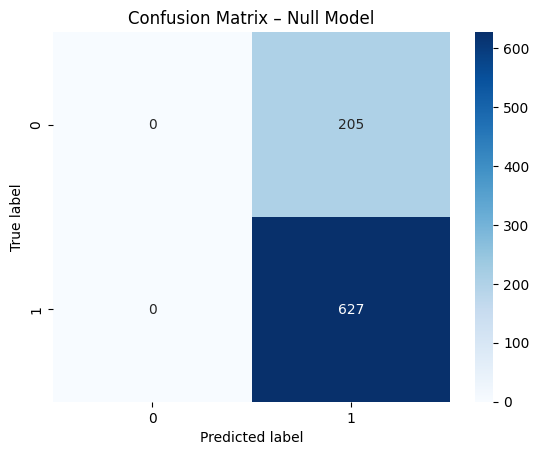

In [41]:

# Confusion matrix for null model

cm_null = confusion_matrix(y_test, y_pred_null)

sns.heatmap(cm_null, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Null Model")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


In [42]:

# Precision, Recall, F1-score for Null Model

print(classification_report(y_test, y_pred_null))


              precision    recall  f1-score   support

         red       0.00      0.00      0.00       205
       white       0.75      1.00      0.86       627

    accuracy                           0.75       832
   macro avg       0.38      0.50      0.43       832
weighted avg       0.57      0.75      0.65       832



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## 2.2 Polynomial SVM

In [43]:

# Polynomial SVM: train and evaluate multiple settings

# Candidate hyperparameters to try
C_values = [0.1, 1, 10, 100]
degrees = [2, 3, 4]

results = []

for C in C_values:
    for deg in degrees:
        # Create and train the model
        poly_svm = SVC(
            kernel="poly",
            C=C,
            degree=deg,
            gamma="scale",   # Good default for most cases
            coef0=1,         # Often helpful for polynomial kernels
            random_state=42
        )
        poly_svm.fit(X_train_scaled, y_train)

        # Predict on test set
        y_pred = poly_svm.predict(X_test_scaled)

        # Evaluate
        acc = accuracy_score(y_test, y_pred)

        results.append({
            "C": C,
            "degree": deg,
            "accuracy": acc
        })

# Show results table (sorted)
results_df = pd.DataFrame(results).sort_values(by="accuracy", ascending=False)
results_df


,C,degree,accuracy
4,1.0,3,0.997596
0,0.1,2,0.996394
2,0.1,4,0.996394
1,0.1,3,0.996394
3,1.0,2,0.996394
5,1.0,4,0.995192
6,10.0,2,0.993990
7,10.0,3,0.992788
8,10.0,4,0.990385
10,100.0,3,0.990385


Best Polynomial SVM settings:
C = 1.0, degree = 3

Classification report:
              precision    recall  f1-score   support

         red       1.00      1.00      1.00       205
       white       1.00      1.00      1.00       627

    accuracy                           1.00       832
   macro avg       1.00      1.00      1.00       832
weighted avg       1.00      1.00      1.00       832



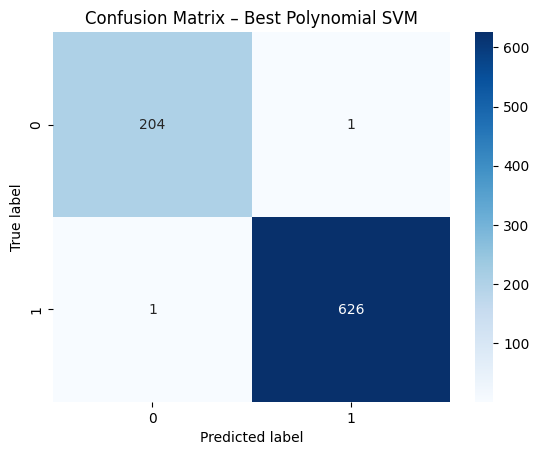

Accuracy (Polynomial SVM): 0.9976
Accuracy (Null Model):     0.7536


In [44]:
# -----------------------------
# Pick the best model based on accuracy (simple baseline choice)
# -----------------------------
best_row = results_df.iloc[0]

best_C = float(best_row["C"])             # C can be float
best_degree = int(best_row["degree"])     # degree MUST be int

best_poly_svm = SVC(
    kernel="poly",
    C=best_C,
    degree=best_degree,
    gamma="scale",
    coef0=1,
    random_state=42
)

best_poly_svm.fit(X_train_scaled, y_train)
y_pred_best = best_poly_svm.predict(X_test_scaled)

# -----------------------------
# Detailed evaluation
# -----------------------------
print("Best Polynomial SVM settings:")
print(f"C = {best_C}, degree = {best_degree}\n")

print("Classification report:")
print(classification_report(y_test, y_pred_best))

cm_poly = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Best Polynomial SVM")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

poly_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (Polynomial SVM): {poly_accuracy:.4f}")
print(f"Accuracy (Null Model):     {null_accuracy:.4f}")


## Grid Search for finding best parameters

In [45]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Pipeline: scale -> SVM
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly", coef0=1, random_state=42))
])

# Parameter grid (start small, but meaningful)
param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__degree": [2, 3, 4],
    "svm__gamma": ["scale", "auto"]
}

# Stratified CV to preserve class proportions
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1_macro",   # robust choice for imbalance
    cv=cv,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'svm__C': [0.1, 1, ...], 'svm__degree': [2, 3, ...], 'svm__gamma': ['scale', 'auto']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter c

In [46]:

# Best parameters and best CV score

print("Best parameters:", grid_search.best_params_)
print("Best CV f1_macro:", grid_search.best_score_)


Best parameters: {'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 'scale'}
Best CV f1_macro: 0.9943093677927208


Classification report (Grid Search best model):
              precision    recall  f1-score   support

         red       1.00      0.99      0.99       205
       white       1.00      1.00      1.00       627

    accuracy                           1.00       832
   macro avg       1.00      0.99      1.00       832
weighted avg       1.00      1.00      1.00       832



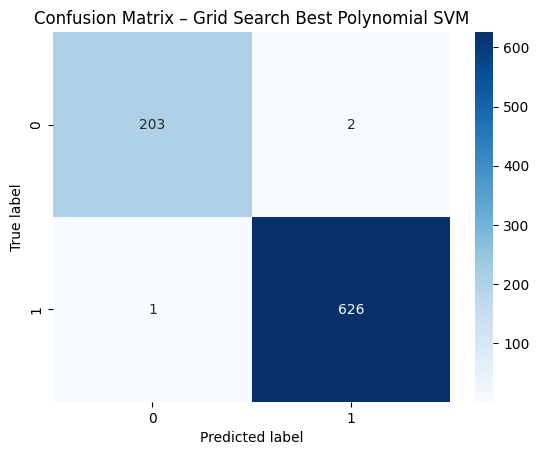

Test Accuracy (Grid Search): 0.9964
Test Accuracy (Null Model):  0.7536


In [47]:

# Evaluate best model on test set

best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)

print("Classification report (Grid Search best model):")
print(classification_report(y_test, y_pred_grid))

cm_grid = confusion_matrix(y_test, y_pred_grid)

sns.heatmap(cm_grid, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Grid Search Best Polynomial SVM")
offer = None
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

test_acc = accuracy_score(y_test, y_pred_grid)
print(f"Test Accuracy (Grid Search): {test_acc:.4f}")
print(f"Test Accuracy (Null Model):  {null_accuracy:.4f}")


## 3. Evaluation of the Model against the unseen data

In [48]:

# Load holdout datasets

X_holdout = pd.read_csv("..//datasets//wine_holdout_X(in).csv")
y_holdout = pd.read_csv("..//datasets//wine_holdout_y(in).csv")

FileNotFoundError: [Errno 2] No such file or directory: '..//datasets//wine_holdout_X(in).csv'

In [ ]:

# Separate ID and features

holdout_ids = X_holdout["wine_id"]
X_holdout_features = X_holdout.drop(columns=["wine_id"])


In [ ]:
# -----------------------------
# Predict holdout labels
# -----------------------------
y_holdout_pred = best_model.predict(X_holdout_features)


In [ ]:

# Create prediction DataFrame

pred_df = pd.DataFrame({
    "wine_id": holdout_ids,
    "predicted_color": y_holdout_pred
})


# Merge with true labels using ID

holdout_results = y_holdout.merge(
    pred_df,
    on="wine_id",
    how="inner"
)

# Quick sanity check
holdout_results.head()



,wine_id,color,predicted_color
0,4622,white,white
1,3287,white,white
2,4592,white,white
3,4833,red,red
4,1904,red,red


In [ ]:

# Evaluation on holdout set

print("Classification Report – Holdout Set:")
print(
    classification_report(
        holdout_results["color"],
        holdout_results["predicted_color"]
    )
)

holdout_accuracy = accuracy_score(
    holdout_results["color"],
    holdout_results["predicted_color"]
)

print(f"Holdout Accuracy: {holdout_accuracy:.4f}")


Classification Report – Holdout Set:
              precision    recall  f1-score   support

         red       1.00      0.98      0.99       256
       white       0.99      1.00      1.00       784

    accuracy                           1.00      1040
   macro avg       1.00      0.99      0.99      1040
weighted avg       1.00      1.00      1.00      1040

Holdout Accuracy: 0.9952


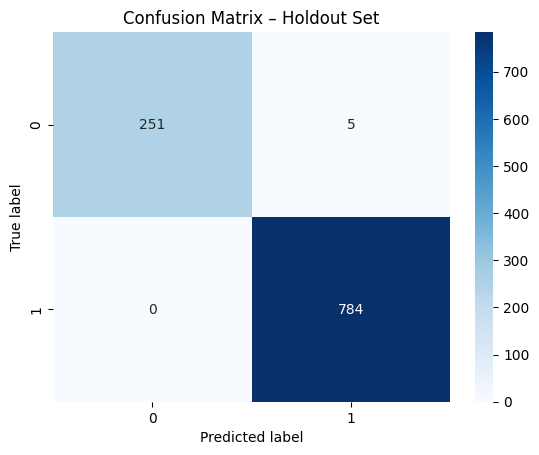

In [ ]:

# Confusion matrix (holdout)

cm_holdout = confusion_matrix(
    holdout_results["color"],
    holdout_results["predicted_color"]
)

sns.heatmap(cm_holdout, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Holdout Set")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


## BONUS TASK: Excellent Wine Classification

In [ ]:
wine_dev = pd.read_csv("wine_development(in).csv")

# Create binary target variable
# 1 = Excellent wine (quality >= 6)
# 0 = Not excellent wine (quality < 6)

y_excellent = (wine_dev["quality"] >= 6).astype(int)


In [ ]:
# Remove target columns
X_excellent = wine_dev.drop(columns=["quality", "color"], errors="ignore")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_excellent,
    y_excellent,
    test_size=0.2,
    random_state=42,
    stratify=y_excellent
)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
svm_poly_excellent = SVC(
    kernel="poly",
    degree=3,
    C=1.0,
    random_state=42
)

svm_poly_excellent.fit(X_train_scaled, y_train)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'poly'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [ ]:
y_pred = svm_poly_excellent.predict(X_test_scaled)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7548076923076923

Confusion Matrix:
[[153 151]
 [ 53 475]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.50      0.60       304
           1       0.76      0.90      0.82       528

    accuracy                           0.75       832
   macro avg       0.75      0.70      0.71       832
weighted avg       0.75      0.75      0.74       832

